# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

5513911c6b3c270d32dbc2f560f613fb


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city_data = []

print("Beginning of Data Retrieval ")
print("----------------------------")

record_count = 0
set_count = 1

for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    city_url = url + "&q=" + city
    if i == 0:
        print(city_url)
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
        
    record_count += 1
        
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_winds = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_data.append ({"City": city
                         ,"Lat": city_lat
                         ,"Lng": city_lng
                         ,"Max Temp": city_max_temp
                         ,"Humidity": city_humidity
                         ,"Cloudiness": city_clouds
                         ,"Wind Speed": city_winds 
                         ,"Country": city_country
                         ,"Date": city_date})
    except:
        print("City not found. Skipping")
    pass
print("-------------------")
print("Data Retrieval Completed")

Beginning of Data Retrieval 
----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d74d113f580952e8b1e8ff10a5327d3a&q=jamestown
Processing Record 0 of Set 1 | jamestown
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | kabanjahe
Processing Record 5 of Set 1 | mount pleasant
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping
Processing Record 8 of Set 1 | alotau
City not found. Skipping
Processing Record 9 of Set 1 | sayyan
Processing Record 10 of Set 1 | zhigansk
Processing Record 11 of Set 1 | olafsvik
Processing Record 12 of Set 1 | guerrero negro
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | puerto narino
Processing Record 16 of Set 1 | pisco
Processing Record 17 of Set 1 | stanovoye
Processing Record 18 of Set 1 | at

Processing Record 33 of Set 4 | conceicao da barra
Processing Record 34 of Set 4 | pokaran
Processing Record 35 of Set 4 | vagur
Processing Record 36 of Set 4 | rocha
Processing Record 37 of Set 4 | dicabisagan
Processing Record 38 of Set 4 | salalah
Processing Record 39 of Set 4 | eureka
Processing Record 40 of Set 4 | kodiak
Processing Record 41 of Set 4 | nanakuli
Processing Record 42 of Set 4 | solovetskiy
City not found. Skipping
Processing Record 43 of Set 4 | birin
Processing Record 44 of Set 4 | batemans bay
Processing Record 45 of Set 4 | conakry
Processing Record 46 of Set 4 | manono
Processing Record 47 of Set 4 | bonavista
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | grand-santi
Processing Record 0 of Set 5 | bongouanou
Processing Record 1 of Set 5 | ust-tsilma
Processing Record 2 of Set 5 | along
Processing Record 3 of Set 5 | tomatlan
Processing Record 4 of Set 5 | iskateley
Processing Record 5 of Set 5 | bolungarvik
City not found. Skip

Processing Record 25 of Set 8 | qax
Processing Record 26 of Set 8 | warangal
Processing Record 27 of Set 8 | loukhi
Processing Record 28 of Set 8 | longyearbyen
Processing Record 29 of Set 8 | ketchikan
Processing Record 30 of Set 8 | marathon
Processing Record 31 of Set 8 | namatanai
Processing Record 32 of Set 8 | ilulissat
Processing Record 33 of Set 8 | arlit
Processing Record 34 of Set 8 | caucaia
Processing Record 35 of Set 8 | mulege
Processing Record 36 of Set 8 | comodoro rivadavia
Processing Record 37 of Set 8 | port augusta
Processing Record 38 of Set 8 | saint-francois
Processing Record 39 of Set 8 | takaka
Processing Record 40 of Set 8 | wakkanai
Processing Record 41 of Set 8 | century village
Processing Record 42 of Set 8 | sisimiut
Processing Record 43 of Set 8 | ambon
Processing Record 44 of Set 8 | kolarovo
Processing Record 45 of Set 8 | bosaso
Processing Record 46 of Set 8 | jati
Processing Record 47 of Set 8 | bartica
Processing Record 48 of Set 8 | troutdale
Proces

Processing Record 12 of Set 12 | sabang
Processing Record 13 of Set 12 | lucenec
Processing Record 14 of Set 12 | padang
Processing Record 15 of Set 12 | hualmay
Processing Record 16 of Set 12 | vuktyl
Processing Record 17 of Set 12 | mitsamiouli
Processing Record 18 of Set 12 | kamenka
Processing Record 19 of Set 12 | valle de allende
Processing Record 20 of Set 12 | bako
Processing Record 21 of Set 12 | andros town
Processing Record 22 of Set 12 | campbell river
Processing Record 23 of Set 12 | ugoofaaru
Processing Record 24 of Set 12 | san juan
Processing Record 25 of Set 12 | sinnamary
Processing Record 26 of Set 12 | manakara
Processing Record 27 of Set 12 | cairns
Processing Record 28 of Set 12 | fez
Processing Record 29 of Set 12 | lorengau
Processing Record 30 of Set 12 | teguldet
Processing Record 31 of Set 12 | kruisfontein
Processing Record 32 of Set 12 | galgani
City not found. Skipping
Processing Record 33 of Set 12 | marcona
City not found. Skipping
Processing Record 34 o

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,19.99,73,90,6.91,US,1612072032
1,rikitea,-23.1203,-134.9692,79.38,74,39,9.57,PF,1612072032
2,kavieng,-2.5744,150.7967,83.57,73,99,11.90,PG,1612072032
3,khatanga,71.9667,102.5000,-47.76,78,43,1.52,RU,1612072033
4,kabanjahe,3.1001,98.4908,82.40,89,75,5.75,ID,1612072033


In [5]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,20.185799,10.749272,49.813663,72.960069,52.154514,8.345538,1.612072e+09
std,32.913862,89.811963,32.658890,19.446877,39.007184,5.901250,6.647460e+01
min,-54.800000,-179.166700,-47.760000,1.000000,0.000000,0.360000,1.612072e+09
25%,-7.871025,-68.519975,30.000000,63.000000,9.000000,4.060000,1.612072e+09
50%,24.750000,15.206350,61.395000,77.000000,58.500000,6.910000,1.612072e+09
75%,47.730675,84.273750,75.200000,87.000000,90.000000,11.400000,1.612072e+09
max,78.218600,179.316700,98.600000,100.000000,100.000000,38.770000,1.612072e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
dirty_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
dirty_data

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_data, inplace = False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,19.99,73,90,6.91,US,1612072032
1,rikitea,-23.1203,-134.9692,79.38,74,39,9.57,PF,1612072032
2,kavieng,-2.5744,150.7967,83.57,73,99,11.90,PG,1612072032
3,khatanga,71.9667,102.5000,-47.76,78,43,1.52,RU,1612072033
4,kabanjahe,3.1001,98.4908,82.40,89,75,5.75,ID,1612072033


In [13]:
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]
clean_city_data.to_csv("clean_city_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

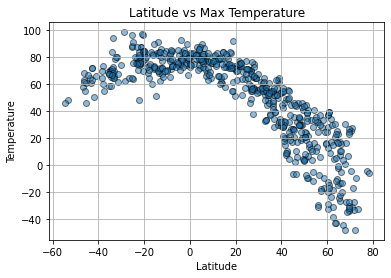

In [24]:
plt.scatter(lats,
           max_temps, edgecolor = "black", marker = "o", alpha =.5, label = "Cities")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Max Temperature")
plt.grid(True)
plt.savefig("Output/Fig1.png")

## Latitude vs. Humidity Plot

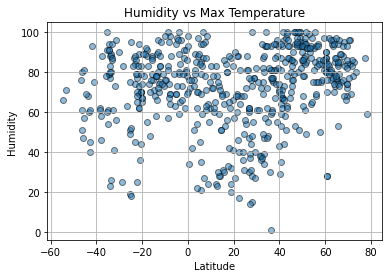

In [25]:
plt.scatter(lats,
           humidity, edgecolor = "black", marker = "o", alpha =.5, label = "Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Max Temperature")
plt.grid(True)
plt.savefig("Output/Fig2.png")

## Latitude vs. Cloudiness Plot

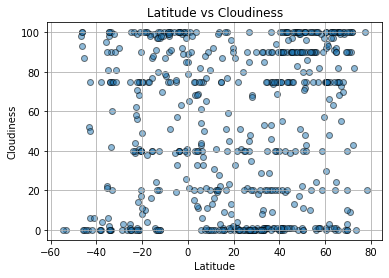

In [26]:
plt.scatter(lats,
           cloudiness, edgecolor = "black", marker = "o", alpha =.5, label = "Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.grid(True)
plt.savefig("Output/Fig3.png")

## Latitude vs. Wind Speed Plot

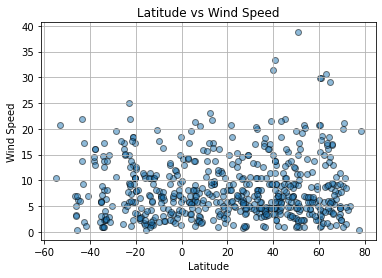

In [27]:
plt.scatter(lats,
           wind_speed, edgecolor = "black", marker = "o", alpha =.5, label = "Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.grid(True)
plt.savefig("Output/Fig4.png")

## Linear Regression

In [38]:
def plot_linear_regressions(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalie, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = 'red')
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The R-value is {rvalue**2}")
    plt.show()
    
northern_hemi_df = clean_city_data.loc[(clean_city_data["Lat"] >= 0)]
southern_hemi_df = clean_city_data.loc[(clean_city_data["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-value is 0.7646165133767614


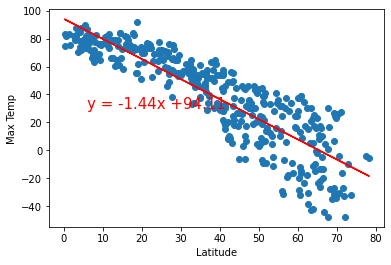

In [39]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regressions(x_values, y_values, "Max Temp", (6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-value is 0.2292534112803064


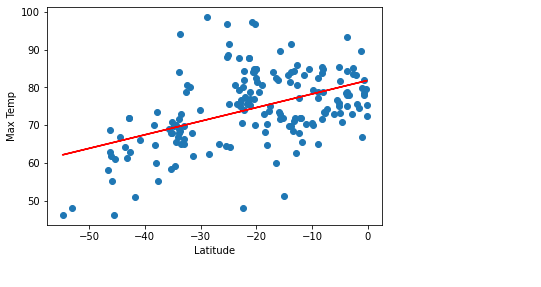

In [40]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regressions(x_values, y_values, "Max Temp", (6,30))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-value is 0.14213538228950215


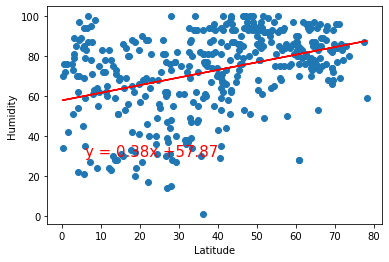

In [41]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regressions(x_values, y_values, "Humidity", (6,30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-value is 0.0781144492272098


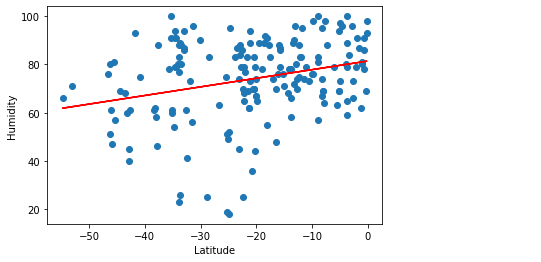

In [42]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regressions(x_values, y_values, "Humidity", (6,30))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-value is 0.0827188275727276


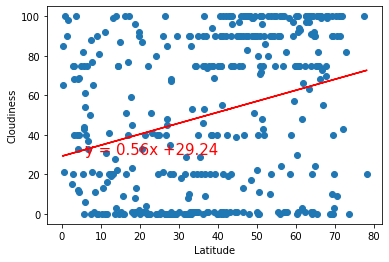

In [43]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regressions(x_values, y_values, "Cloudiness", (6,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-value is 0.09840052561941327


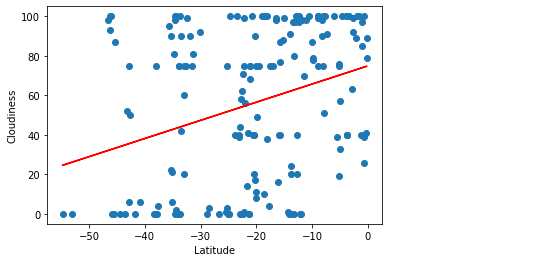

In [44]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regressions(x_values, y_values, "Cloudiness", (6,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-value is 0.0007616468660119325


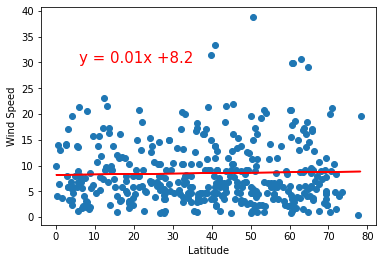

In [45]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regressions(x_values, y_values, "Wind Speed", (6,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-value is 0.011236475437034543


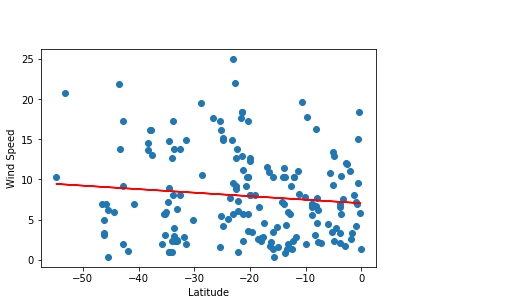

In [46]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regressions(x_values, y_values, "Wind Speed", (6,30))